In [95]:
import matplotlib.pyplot as plt
import numpy as np
from vis_creator import  VisCal, VisTrue


In [96]:
vc = VisCal("/data/scratch/apw737/catall_nobright/viscatBC_4c_b")
print("redcal rms", vc.get_rms(), np.mean(vc.chi2["Jee"][0]))
vt = VisTrue("/data/scratch/apw737/catall_nobright/viscatBC_4c_b")
print("true sim rms", vt.get_rms())

Get V_obs from /data/scratch/apw737/catall_nobright/viscatBC_4c_b_g.uvh5
Get model from /data/scratch/apw737/catall_nobright/viscatBC_4c_b_g_cal_dict.npz
[[2, 11, 19, 32, 37, 41], [3, 12, 20, 27, 33, 38], [0, 9, 24, 30, 35, 42, 44], [6, 15, 23], [10, 18, 36, 40], [4, 13, 28, 34], [1, 25, 31, 43], [14, 22], [7, 16], [17, 39], [5, 29], [21], [8], [26]]


Telescope hera_sim is not in known_telescopes.


Get noise from /data/scratch/apw737/catall_nobright/viscatBC_4c_b_nn.npz
redcal rms 0.1929290054981194 1.076451
Get true model from /data/scratch/apw737/catall_nobright/viscatBC_4c_b.uvh5
Get true gains from /data/scratch/apw737/catall_nobright/viscatBC_4c_b.calfits
Get V_obs from /data/scratch/apw737/catall_nobright/viscatBC_4c_b_g.uvh5


Telescope hera_sim is not in known_telescopes.
telescope_location is not set. Using known values for HERA.
antenna_positions is not set. Using known values for HERA.
Telescope hera_sim is not in known_telescopes.


true sim rms 0.25792528463027


### Plot the redcal g and V. 

Because redundant baselines exist, the V values are the V for redundant baseline groups

Plot the amplitudes then phases.

Plot g amp


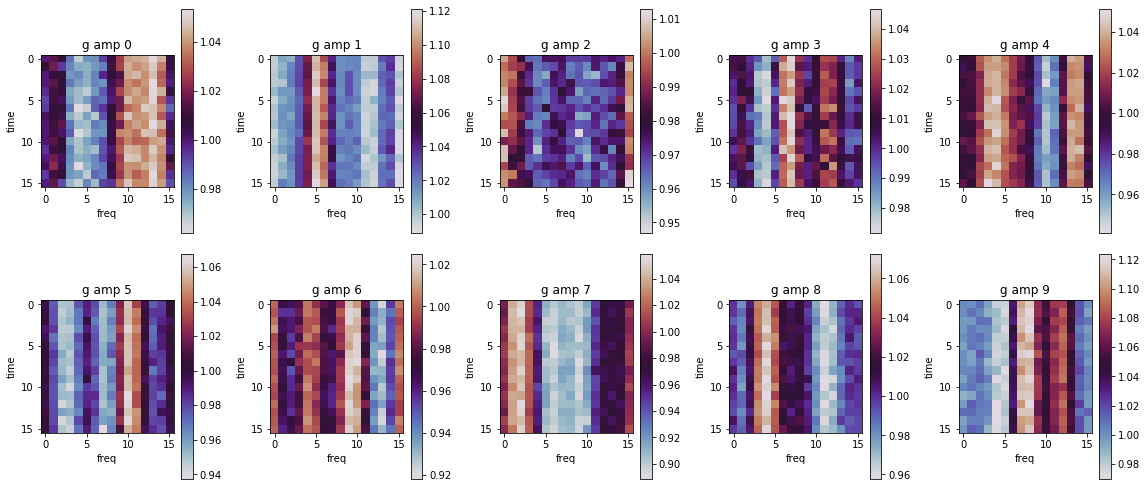

In [97]:
plt.rcParams['figure.figsize'] = [16, 7]
vc.plot_data("g", 5, "amp")

Plot g phase


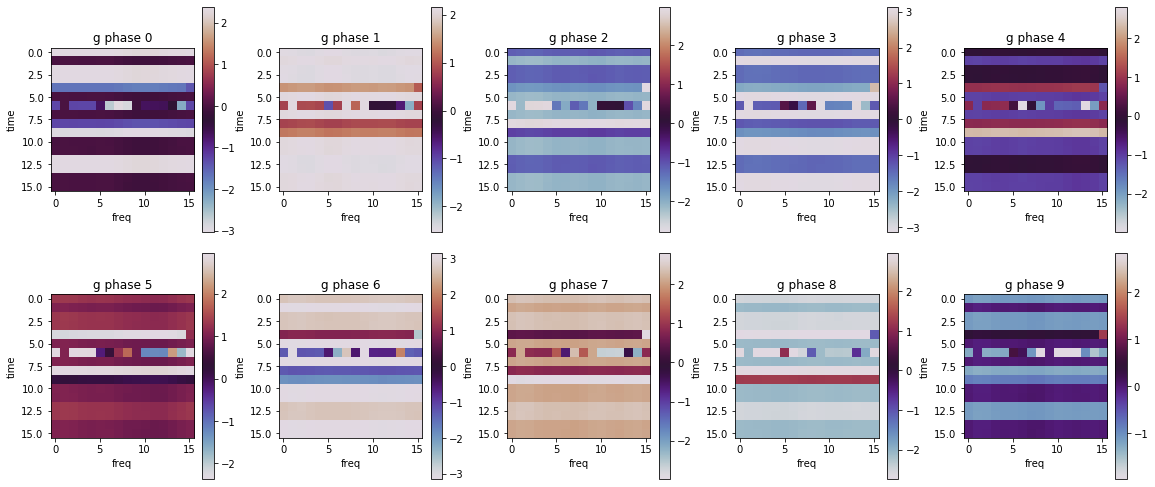

In [98]:
plt.rcParams['figure.figsize'] = [16, 7]
vc.plot_data("g", 5, "phase")

Plot V amp


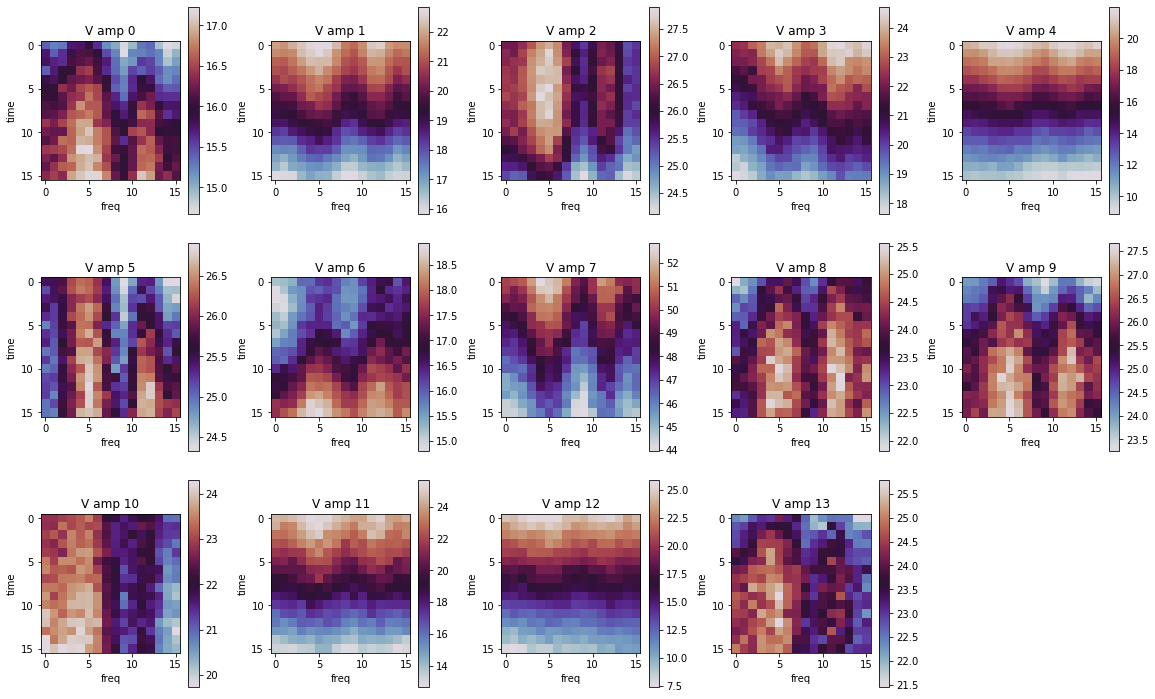

In [99]:
plt.rcParams['figure.figsize'] = [16, 10]
vc.plot_data("V", 5, "amp")
    

Plot V phase


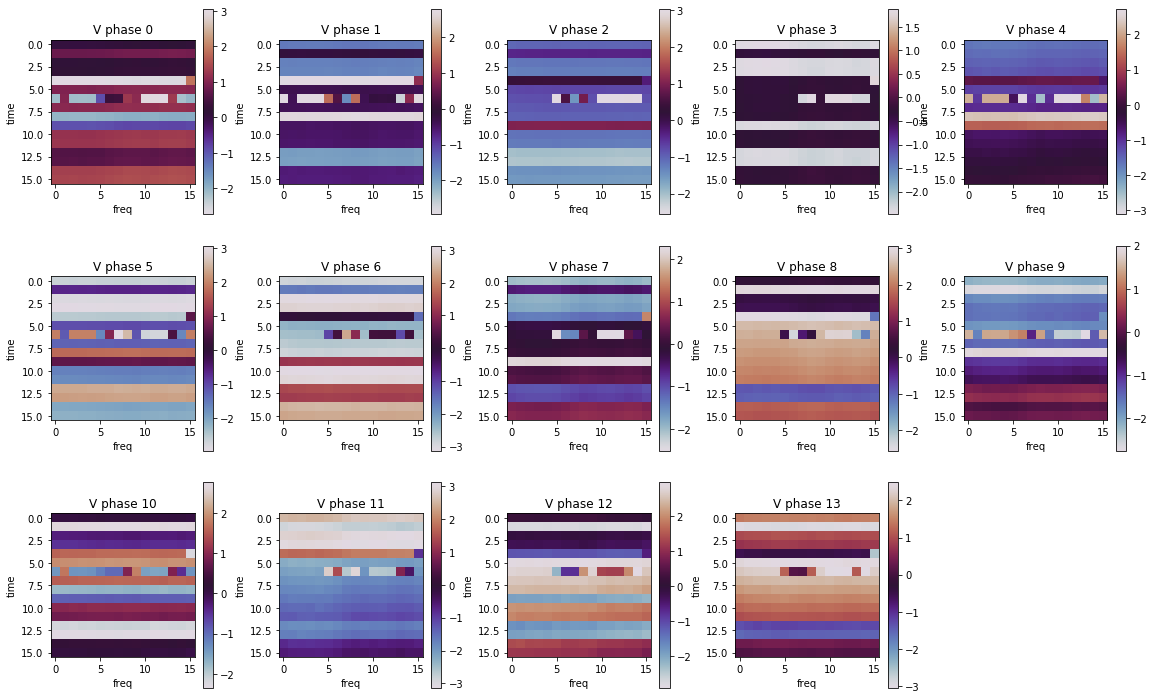

In [100]:
vc.plot_data("V", 5, "phase")

### Plot the simulated (true) g and V. 

There are no redundant groups. They could be grouped as determind by redcal, but the Vs won't be identical for all baselines in a group.

Plot the amplitudes then phases.

Plot g amp


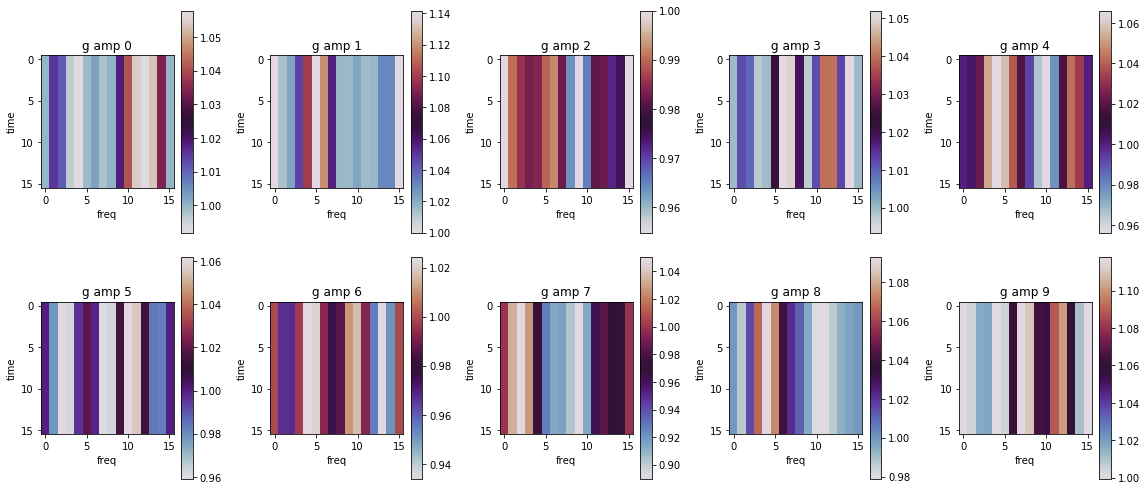

In [101]:
plt.rcParams['figure.figsize'] = [16, 7]
vt.plot_data("g", 5, "amp")

Plot g phase


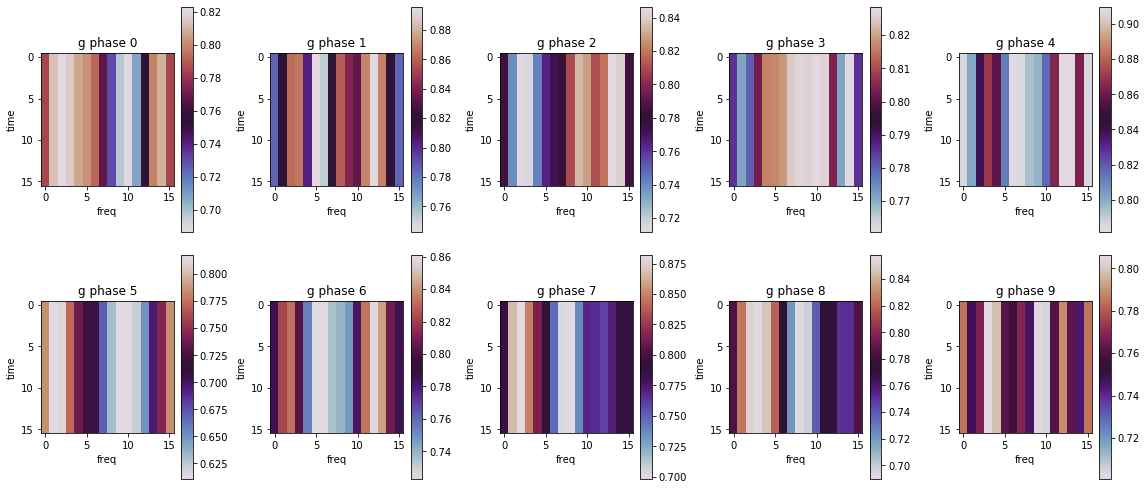

In [102]:
plt.rcParams['figure.figsize'] = [16, 7]
vt.plot_data("g", 5, "phase")

Plot V amp


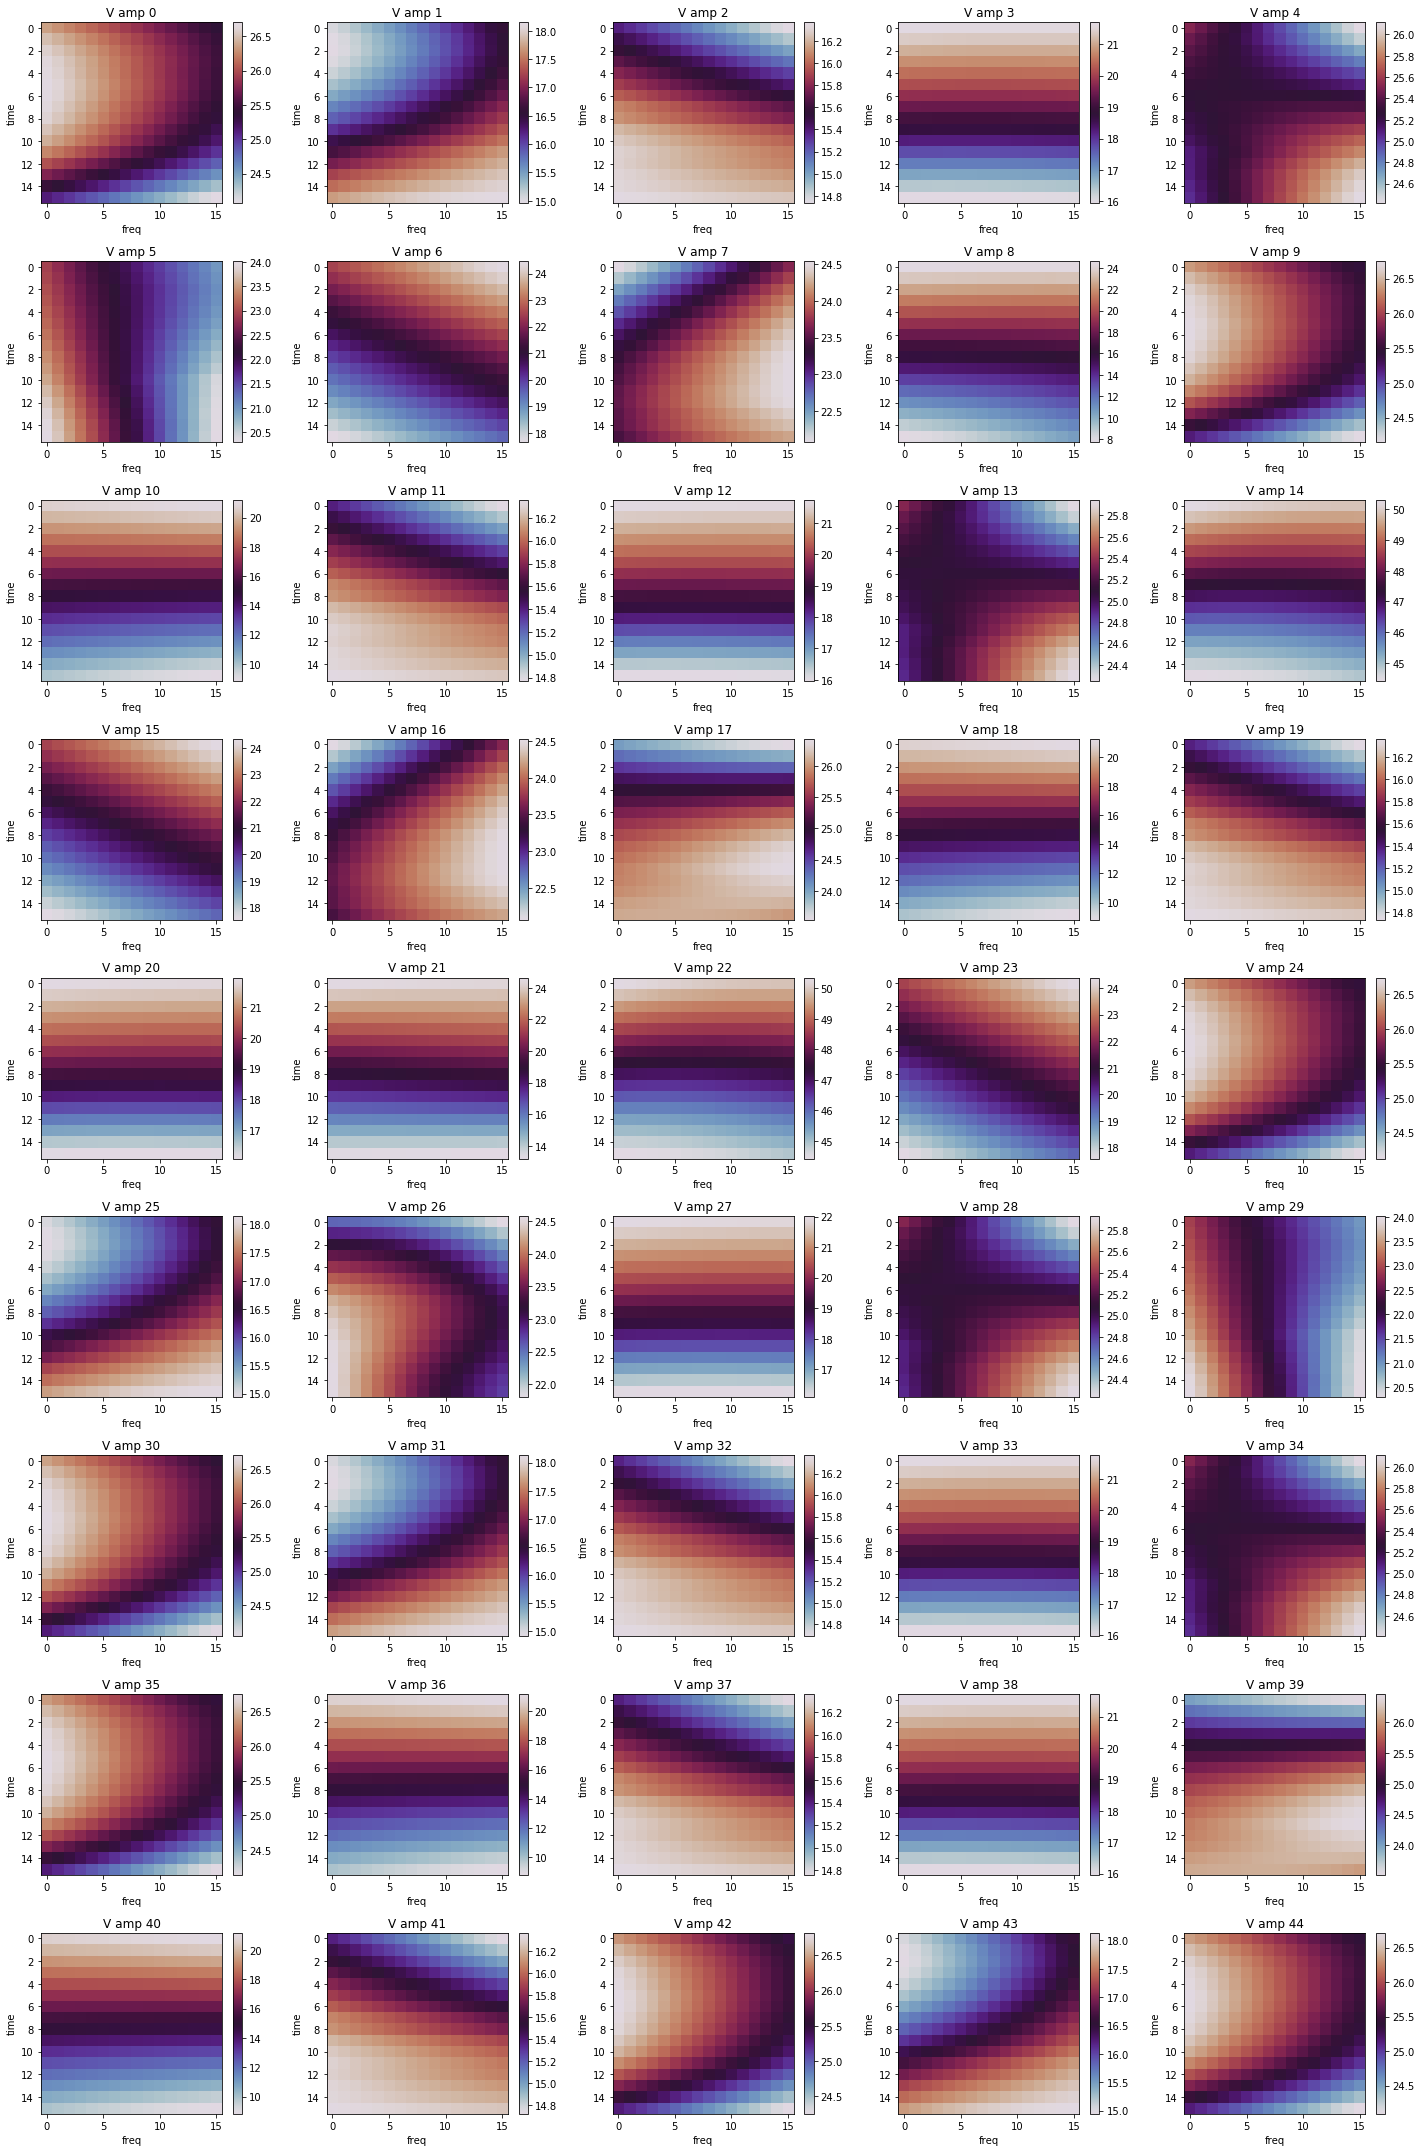

In [103]:
plt.rcParams['figure.figsize'] = [20, 30]
vt.plot_data("V", 5, "amp")

Plot V phase


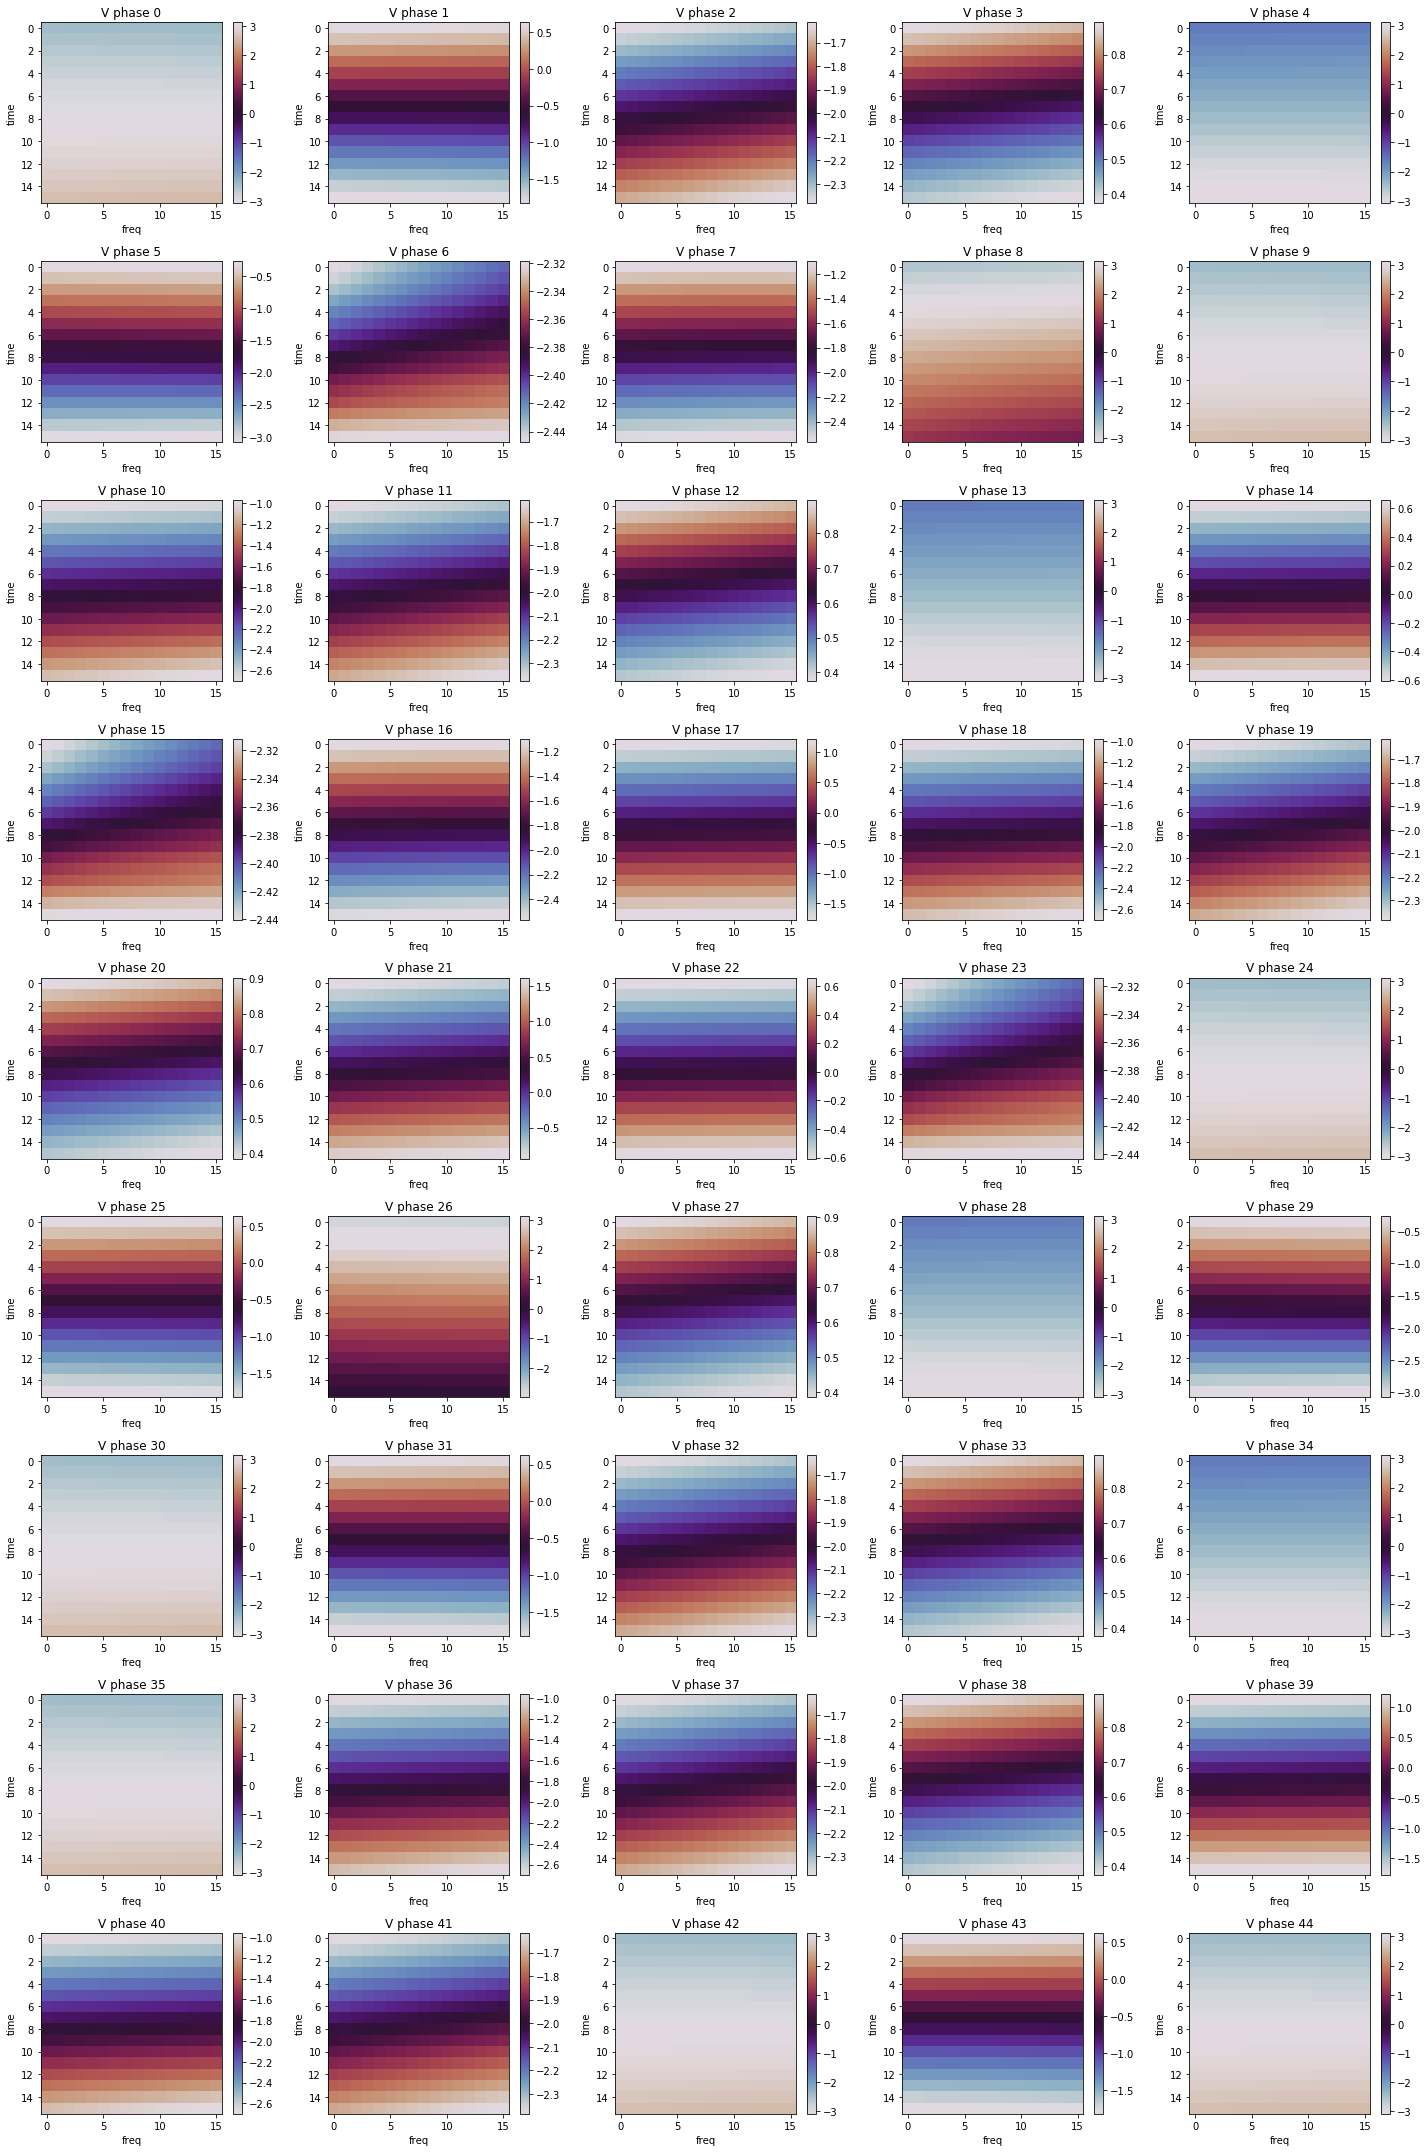

In [104]:
plt.rcParams['figure.figsize'] = [20, 30]
vt.plot_data("V", 5, "phase")

### Compare d with s, from redcal

redcal abs(d), abs(s) limited to the first few values


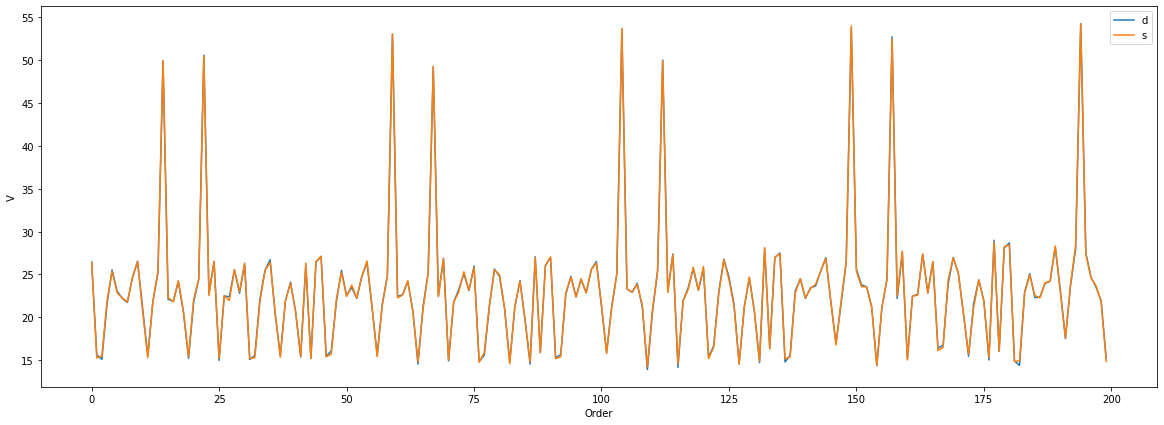

In [105]:
plt.rcParams['figure.figsize'] = [20, 7]
limit_to = 200
plt.plot(np.ravel(np.abs(vc.V_obs))[:limit_to], label="d")
plt.plot(np.abs(np.ravel(vc.get_simulated_visibilities()))[:limit_to], label="s")     # get_simulated visibilities does gg*V 
plt.xlabel("Order")
plt.ylabel("V")
plt.legend()
print("redcal abs(d), abs(s) limited to the first few values")

redcal phase(d), phase(s) limited to the first few values


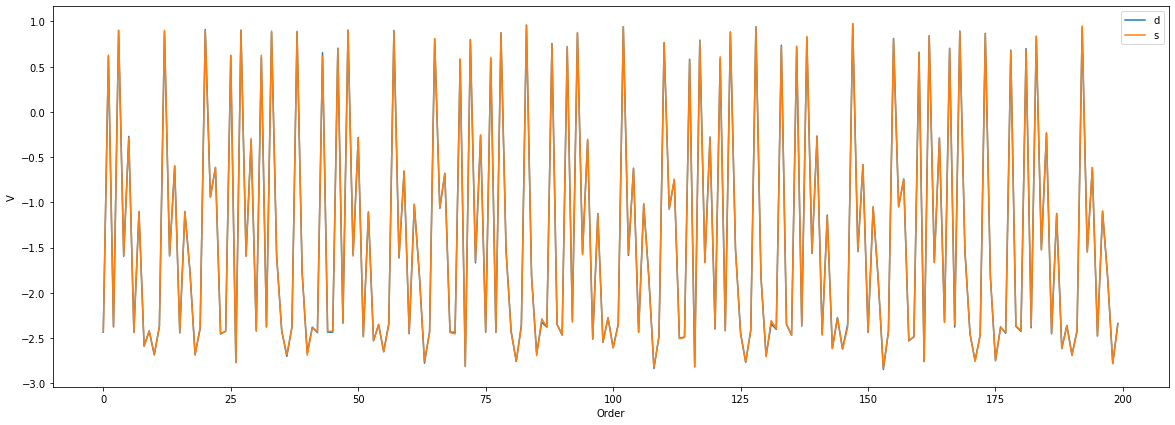

In [106]:
plt.rcParams['figure.figsize'] = [20, 7]
limit_to = 200
plt.plot(np.ravel(np.angle(vc.V_obs))[:limit_to], label="d")
plt.plot(np.angle(np.ravel(vc.get_simulated_visibilities()))[:limit_to], label="s")     # get_simulated visibilities does gg*V 
plt.xlabel("Order")
plt.ylabel("V")
plt.legend()
print("redcal phase(d), phase(s) limited to the first few values")

### Compare d with s, from sim

sim abs(d), abs(s) limited to the first few values


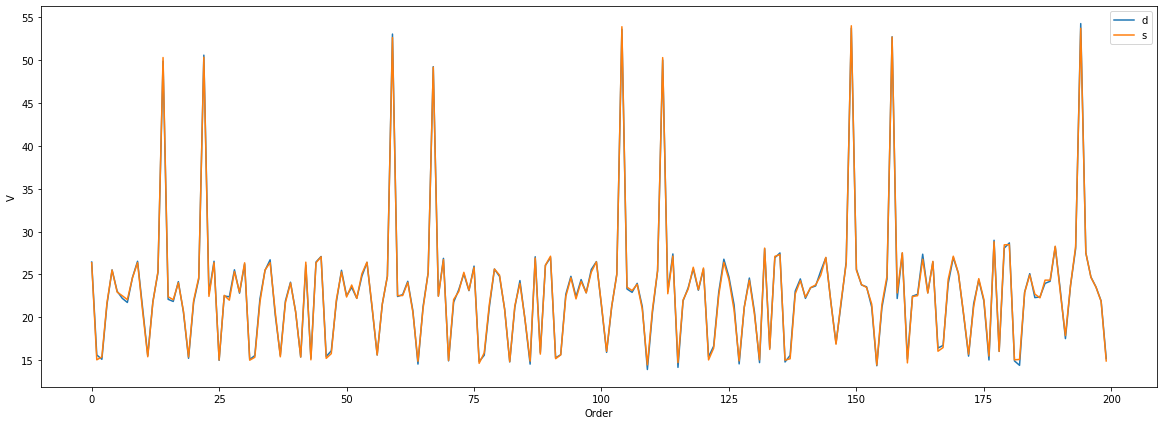

In [107]:
plt.rcParams['figure.figsize'] = [20, 7]
limit_to = 200
plt.plot(np.ravel(np.abs(vt.V_obs))[:limit_to], label="d")
plt.plot(np.abs(np.ravel(vt.get_simulated_visibilities()))[:limit_to], label="s")     # get_simulated visibilities does gg*V 
plt.xlabel("Order")
plt.ylabel("V")
plt.legend()
print("sim abs(d), abs(s) limited to the first few values")

sim phase(d), phase(s) limited to the first few values


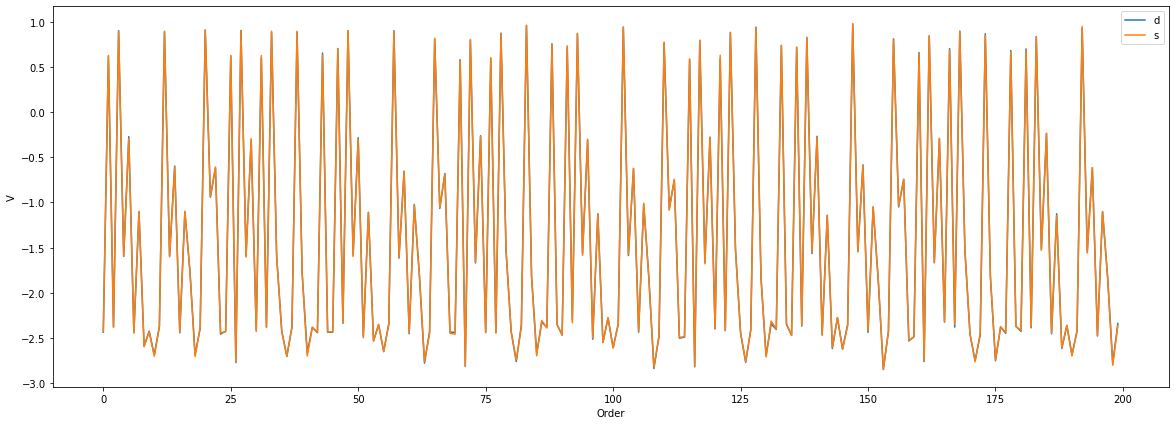

In [108]:
plt.rcParams['figure.figsize'] = [20, 7]
limit_to = 200
plt.plot(np.ravel(np.angle(vt.V_obs))[:limit_to], label="d")
plt.plot(np.angle(np.ravel(vt.get_simulated_visibilities()))[:limit_to], label="s")     # get_simulated visibilities does gg*V 
plt.xlabel("Order")
plt.ylabel("V")
plt.legend()
print("sim phase(d), phase(s) limited to the first few values")

### Plot the weights and noise

The weights are used to calculate chi2. The noise is used to calculate the likelihood

weights, noise limited to the first few values


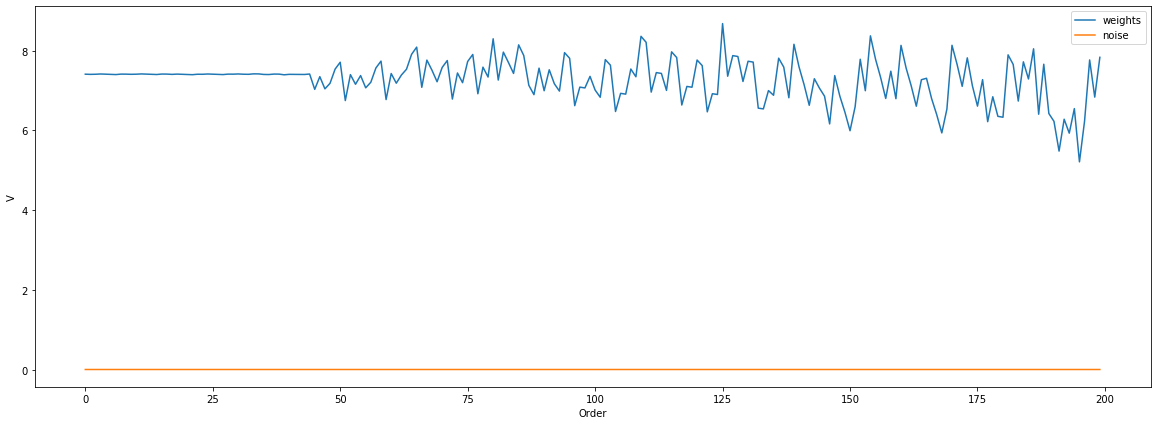

In [117]:
plt.rcParams['figure.figsize'] = [20, 7]
limit_to = 200
plt.plot(np.ravel(vc.weights)[:limit_to], label="weights")
plt.plot(np.ravel(vc.obs_variance.real)[:limit_to], label="noise")     # get_calibrated_visibilities does d/gg 
plt.xlabel("Order")
plt.ylabel("V")
plt.legend()
print("weights, noise limited to the first few values")

## Compare calibrated (redcal) V with true V  

This is not the same as d or s. Degeneracy fix not applied.

sim abs(V), abs(calibrated V) limited to the first few values


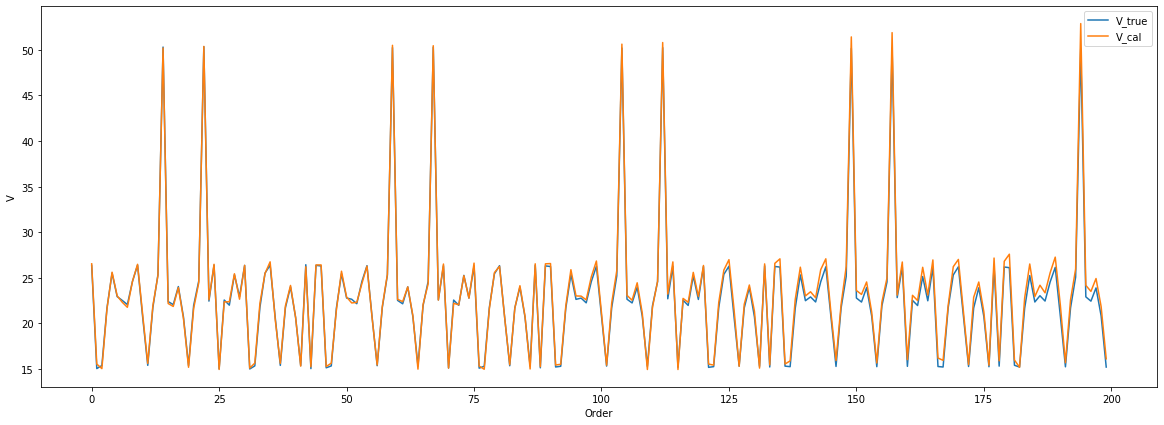

In [109]:
plt.rcParams['figure.figsize'] = [20, 7]
limit_to = 200
plt.plot(np.ravel(np.abs(vt.V_model))[:limit_to], label="V_true")
plt.plot(np.abs(np.ravel(vc.get_calibrated_visibilities()))[:limit_to], label="V_cal")     # get_calibrated_visibilities does d/gg 
plt.xlabel("Order")
plt.ylabel("V")
plt.legend()
print("sim abs(V), abs(calibrated V) limited to the first few values")

sim phase(V), phase(calibrated V) limited to the first few values


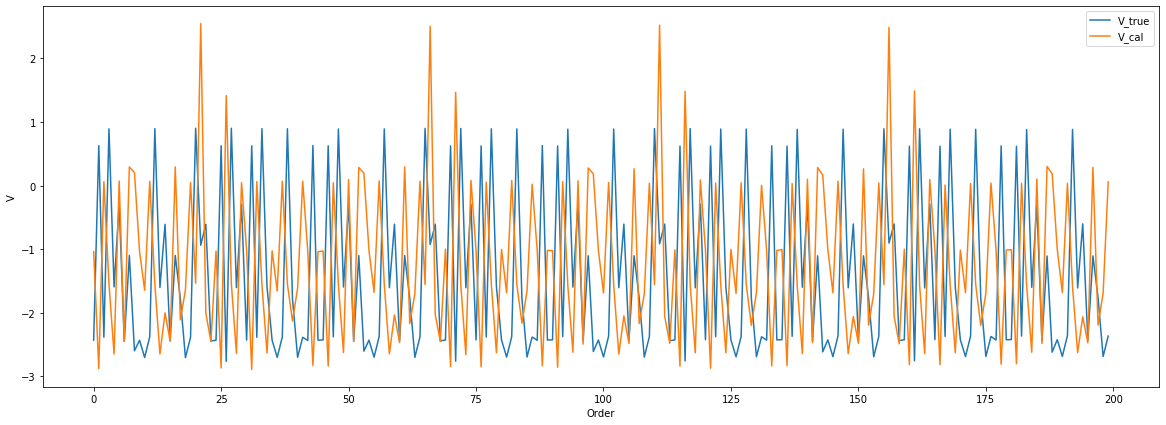

In [110]:
plt.rcParams['figure.figsize'] = [20, 7]
limit_to = 200
plt.plot(np.ravel(np.angle(vt.V_model))[:limit_to], label="V_true")
plt.plot(np.angle(np.ravel(vc.get_calibrated_visibilities()))[:limit_to], label="V_cal")     # get_calibrated_visibilities does d/gg 
plt.xlabel("Order")
plt.ylabel("V")
plt.legend()
print("sim phase(V), phase(calibrated V) limited to the first few values")

### Compare calibrated (redcal) V with true V applying degeneracy fix to redcal gains

In [111]:
import hera_cal as hc



def fix_degeneracies():
    """
    Use the true (input) gains to fix the degeneracy directions in a set of 
    redundantly-calibrated gain solutions. This replaces the absolute 
    calibration that would normally be applied to a real dataset in order to 
    fix the degeneracies.

    Note that this step should only be using the true gains to fix the 
    degeneracies, and shouldn't add any more information beyond that.

    N.B. This is just a convenience function for calling the 
    remove_degen_gains() method of the redcal.RedundantCalibrator class. It 
    also assumes that only the 'ee' polarization will be used.

    Parameters
    ----------
    red_gains : dict of array_like
        Dict containing 2D array of complex gain solutions for each antenna 
        (and polarization).
        This is cal['g_omnical']

    true_gains : dict
        Dictionary of true (input) gains as a function of frequency. 
        Expected format: 
            key = antenna number (int)
            value = 1D numpy array of shape (Nfreqs,)
        This is the g_new.calfits file.


    Returns
    -------
    new_gains : dict
        Dictionary with the same items as red_gains, but where the degeneracies 
        have been fixed in the gain solutions.

    uvc : UVCal, optional
        If outfile is specified, also returns a UVCal object containing the 
        updated gain solutions.
    """

    def un_key(gains):
        stripped = np.empty((gains[(0, "Jee")].shape[0], gains[(0, "Jee")].shape[1], len(gains.keys())), 
                            dtype=type(gains[(0, "Jee")][0, 0]))
        for i, key in enumerate(gains):
            ant = key[0]
            stripped[:, : ,ant] = gains[key]
        return stripped

    def fix(cal, true_g, gains):
            # Fix degeneracies on "gains"
            
        gains_dict = {}

        for i in range(gains.shape[2]):       # nant
            gains_dict[(i, "Jee")] = gains[:, :, i]

        new_gains = RedCal.remove_degen_gains(gains_dict,             # Dict containing 2D array of complex gain solutions for each antenna 
                                          degen_gains=true_g, 
                                          mode='complex')
        new_gains = un_key(new_gains)


        return new_gains

    print("Fixing degeneracies")


    # Need the redundant groups in the right format, antenna pairs and ee pol
    # Redundancy might have been removed but that's ok because each bl in a group still.
    reds = []
    for rg in vc.redundant_groups:
        new_rg = []
        for bl in rg:
            ants = vc.bl_to_ants[bl]
            ants = (ants[0], ants[1], "ee")
            new_rg.append(ants)
        reds.append(new_rg)


    true_gains = {} 
    for i in range(vc.nant):
        true_gains[(i, 'Jee')] = vt.g_bar[:, :, i].astype(np.complex128)


    # Create calibrator and dict for the work
    RedCal = hc.redcal.RedundantCalibrator(reds)

    # We want to find x_new so that fix(g_bar(1+x)) = fix(g_bar)(1+x_new)
    #   x_new = fix(g_bar(1+x))/fix(g_bar) - 1

    vc.g_bar = fix(RedCal, true_gains, vc.g_bar.astype(np.complex128))


In [ ]:
The gains are still off. Th eproblem is that they are not the same relative to each other.